In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
subs = pd.read_csv(r'subs.csv')
content = pd.read_csv(r'content_consumption.csv')

In [6]:
subs.sample()

,user_id,age_group,city_tier,subscription_plan,new_subscription_plan,upgrade_or_not
6997,UIDLC48a81aa121b,35-44,Tier 3,Basic,Free,0


In [7]:
subs.shape

(25014, 6)

In [8]:
content.shape

(430752, 3)

In [9]:
df = pd.merge(subs, content,on = 'user_id',how = 'left')

In [10]:
df.head()

,user_id,age_group,city_tier,subscription_plan,new_subscription_plan,upgrade_or_not,device_type,total_watch_time_mins
0,UIDLC0001086afc3,35-44,Tier 2,Premium,Free,0,Mobile,8436
1,UIDLC0001086afc3,35-44,Tier 2,Premium,Free,0,TV,2415
2,UIDLC0001086afc3,35-44,Tier 2,Premium,Free,0,Laptop,1373
3,UIDLC0002189b09f,18-24,Tier 2,Premium,Free,0,Mobile,2851
4,UIDLC0002189b09f,18-24,Tier 2,Premium,Free,0,TV,468


### Data Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75042 entries, 0 to 75041
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                75042 non-null  object
 1   age_group              75042 non-null  object
 2   city_tier              75042 non-null  object
 3   subscription_plan      75042 non-null  object
 4   new_subscription_plan  75042 non-null  object
 5   upgrade_or_not         75042 non-null  int64 
 6   device_type            75042 non-null  object
 7   total_watch_time_mins  75042 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 4.6+ MB


In [12]:
df.isna().sum()

,0
user_id,0
age_group,0
city_tier,0
subscription_plan,0
new_subscription_plan,0
upgrade_or_not,0
device_type,0
total_watch_time_mins,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.select_dtypes(exclude=['int','float']).columns

Index(['user_id', 'age_group', 'city_tier', 'subscription_plan',
       'new_subscription_plan', 'device_type'],
      dtype='object')

In [15]:
print('Feature ----->  Unique Values \n \n')
for i in df.select_dtypes(exclude=['int','float']).columns:
  if i != "user_id":
    print(f'{i}--->{df[i].nunique()} \n')
    print(f'{df[i].unique()} \n')



Feature ----->  Unique Values 
 

age_group--->4 

['35-44' '18-24' '25-34' '45+'] 

city_tier--->3 

['Tier 2' 'Tier 1' 'Tier 3'] 

subscription_plan--->3 

['Premium' 'Free' 'Basic'] 

new_subscription_plan--->3 

['Free' 'Basic' 'Premium'] 

device_type--->3 

['Mobile' 'TV' 'Laptop'] 



In [16]:
df['total_watch_time_mins'].describe()

,total_watch_time_mins
count,75042.000000
mean,2918.391221
std,3969.018121
min,17.000000
25%,609.000000
50%,1339.000000
75%,3423.000000
max,39966.000000


### Data Visualization

In [17]:
df.sample()

,user_id,age_group,city_tier,subscription_plan,new_subscription_plan,upgrade_or_not,device_type,total_watch_time_mins
70020,UIDLCeed60b28bd3,35-44,Tier 1,Premium,Free,0,Mobile,4717


In [18]:
type(df.shape[0]/100)

float

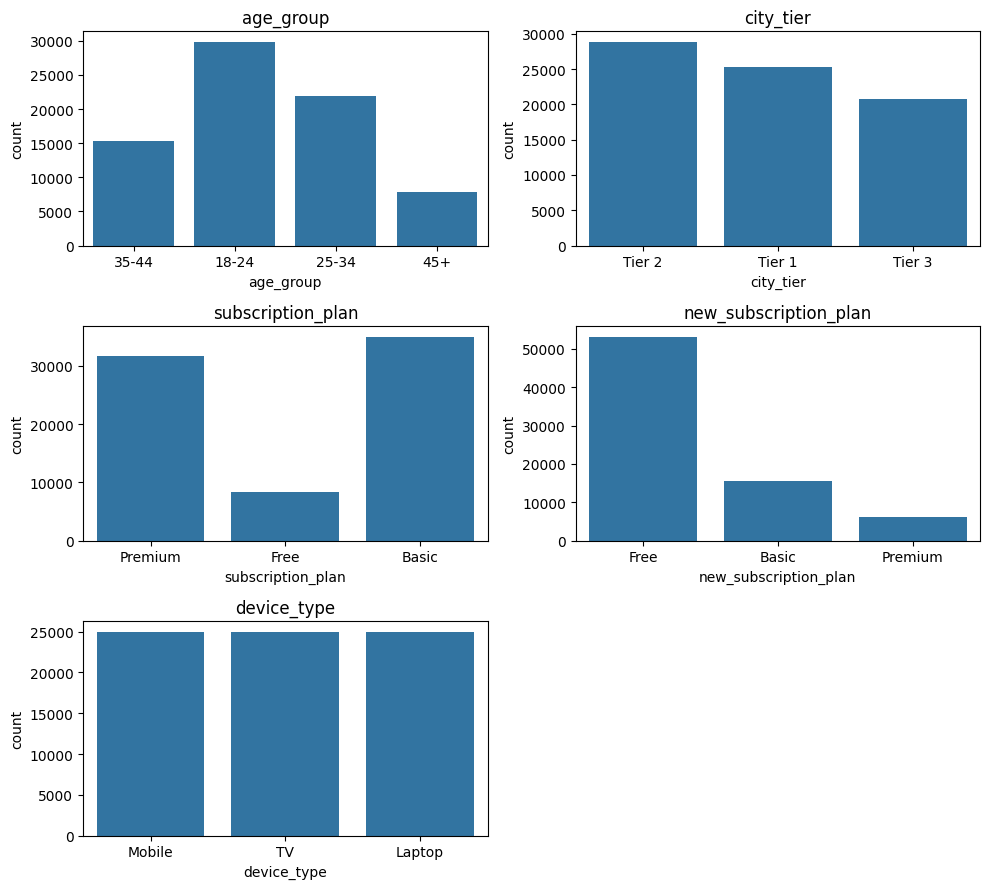

In [19]:
cols = ['age_group','city_tier','subscription_plan','new_subscription_plan','device_type']

## How many plots will i need
n = len(cols)
rows = (n//2)+(n%2)


plt.figure(figsize = (10,3*rows))

for i, col in enumerate(cols,1):
  plt.subplot(rows, 2, i)
  sns.countplot(x = df[col])
  plt.title(col)

plt.tight_layout()
plt.show()


In [20]:
df.sample()

,user_id,age_group,city_tier,subscription_plan,new_subscription_plan,upgrade_or_not,device_type,total_watch_time_mins
11372,UIDLC27eb16fac68,18-24,Tier 1,Premium,Free,0,Laptop,1190


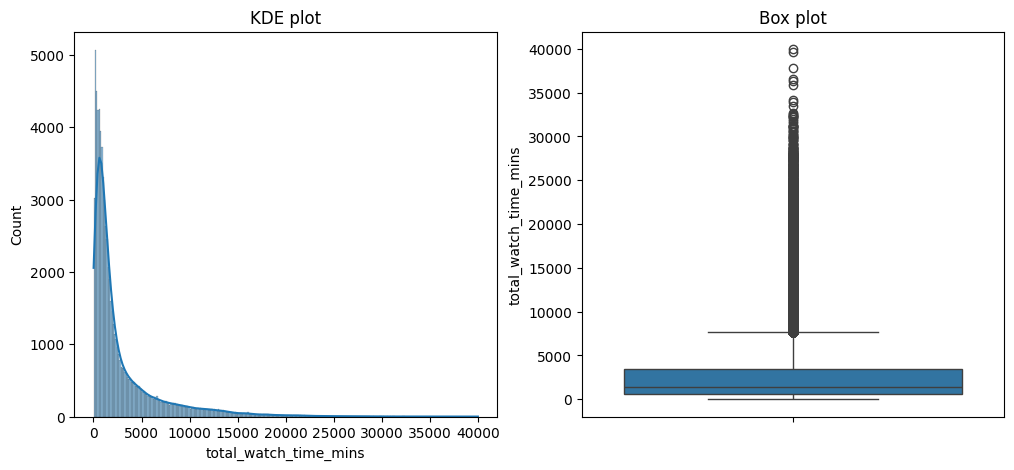

In [21]:
fig,axes = plt.subplots(1,2, figsize =(12,5))

sns.histplot(df['total_watch_time_mins'], kde=True, ax = axes[0])

sns.boxplot(df['total_watch_time_mins'], ax=axes[1])
axes[0].set_title('KDE plot')
axes[1].set_title('Box plot')

plt.show()

In [22]:
round(skew(df['total_watch_time_mins']),2)

np.float64(2.65)

##Now for bivariate analysis

## Pairs for bi-variate analysis.

age-group - subscription_plan (old and new)

age-group - upgrade_or_not

age-group - total_watch_time_mins

city_tier - subscription_plan (old and new)

city_tier - upgrade_or_not

city_tier - total_watch_time_mins

In [23]:
df.columns

Index(['user_id', 'age_group', 'city_tier', 'subscription_plan',
       'new_subscription_plan', 'upgrade_or_not', 'device_type',
       'total_watch_time_mins'],
      dtype='object')

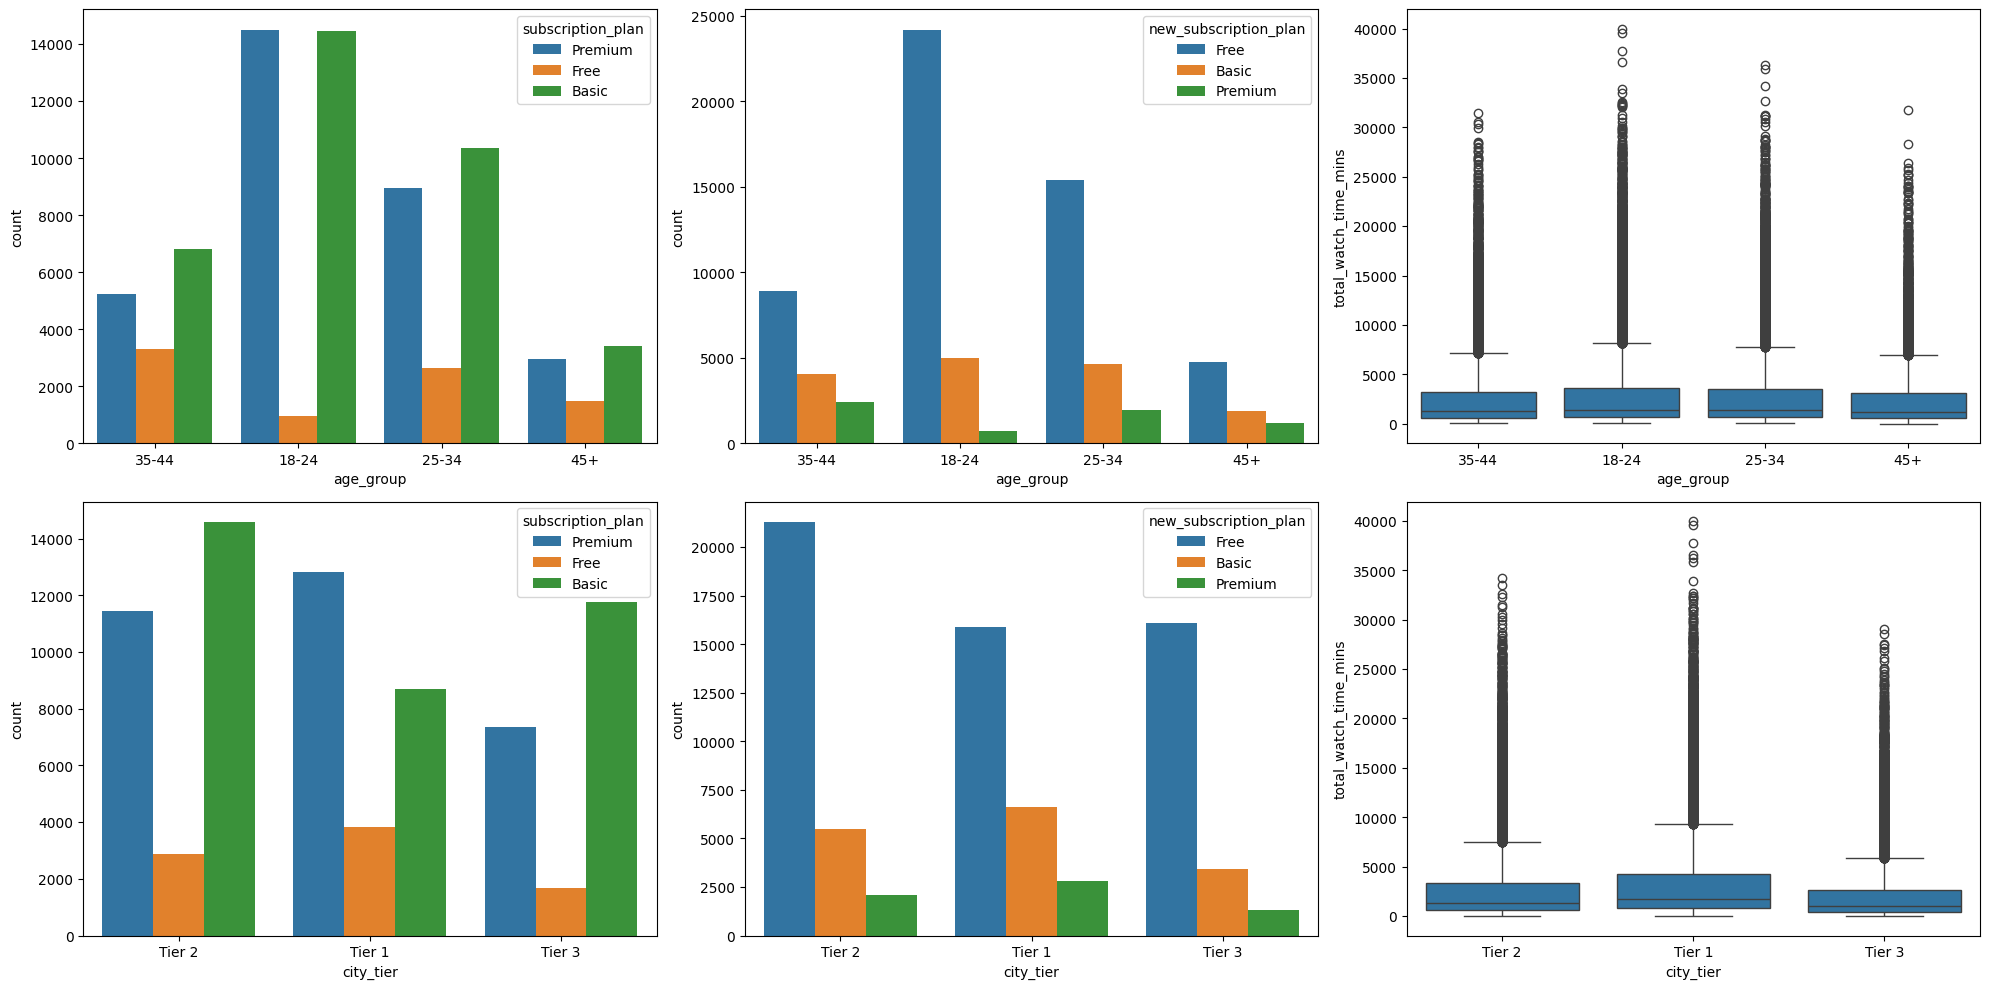

In [24]:
fig, axes = plt.subplots(2,3,figsize =(20,10))

sns.countplot(x = df['age_group'], hue = df['subscription_plan'], ax = axes[0,0])
sns.countplot(x = df['age_group'], hue = df['new_subscription_plan'], ax = axes[0,1])
sns.boxplot(x = df['age_group'],y = df['total_watch_time_mins'], ax = axes[0, 2])

sns.countplot(x = df['city_tier'], hue = df['subscription_plan'], ax = axes[1, 0])
sns.countplot(x = df['city_tier'], hue = df['new_subscription_plan'], ax = axes[1, 1])
sns.boxplot(x = df['city_tier'],y = df['total_watch_time_mins'], ax = axes[1, 2])


plt.tight_layout()
plt.show()

old subscription plan - new_subscription_plan

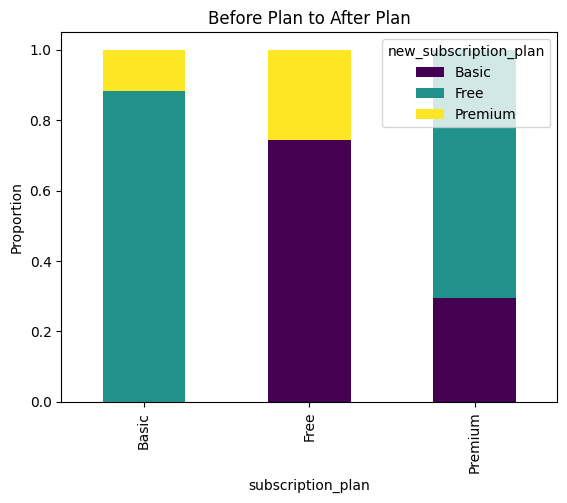

In [25]:
ct = pd.crosstab(df['subscription_plan'], df['new_subscription_plan'], normalize='index')
ct.plot(kind='bar', stacked=True, colormap='viridis')
plt.ylabel('Proportion')
plt.title('Before Plan to After Plan')
plt.show()

subscription_plans(old and new) - total_watch_time_mins

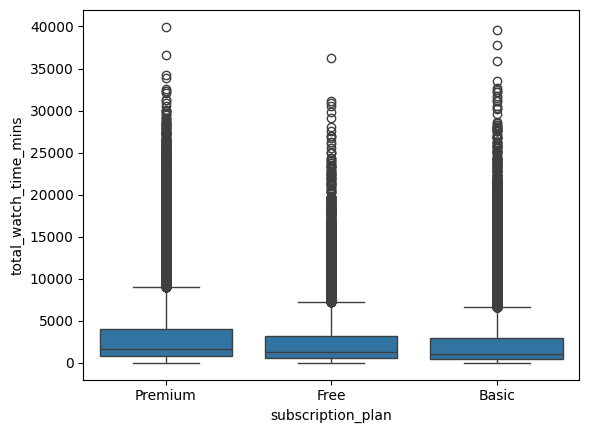

In [26]:
sns.boxplot(data = df, x = 'subscription_plan', y = 'total_watch_time_mins')
plt.show()

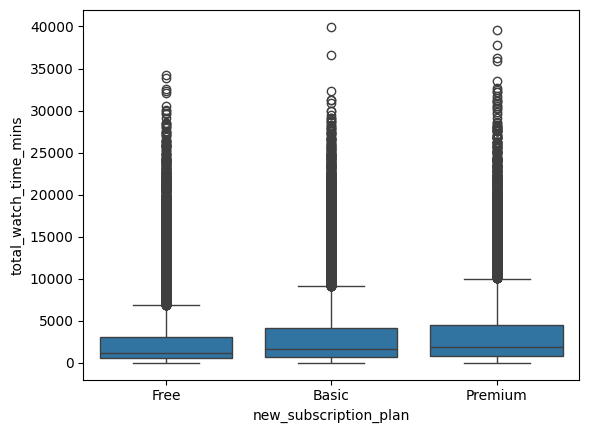

In [27]:
sns.boxplot(data = df, x = 'new_subscription_plan', y = 'total_watch_time_mins')
plt.show()

device_type - total_watch_time_mins

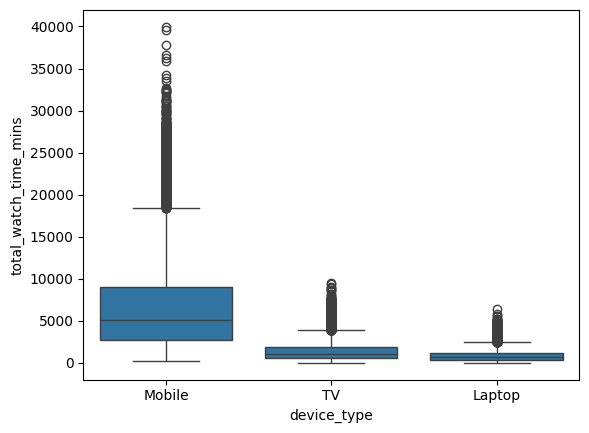

In [28]:
sns.boxplot(data = df, x = 'device_type', y = 'total_watch_time_mins')
plt.show()

Average total_watch_time_mins per subscription_plan



In [56]:
df.sample()

,user_id,age_group,city_tier,subscription_plan,new_subscription_plan,upgrade_or_not,device_type,total_watch_time_mins
11654,UIDLC28c3ca1e88b,18-24,Tier 1,Basic,Free,0,Laptop,1023


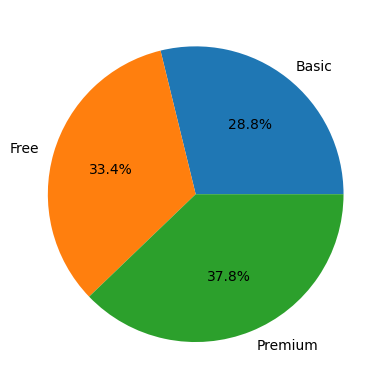

In [72]:
df_avg_watchtime_per_sub = df.groupby('subscription_plan')['total_watch_time_mins'].mean().reset_index()
plt.pie(df_avg_watchtime_per_sub['total_watch_time_mins'], labels = df_avg_watchtime_per_sub['subscription_plan'],
        autopct = '%1.1f%%')
plt.show()

Upgrade rate (mean of upgrade_or_not) per subscription_plan

In [76]:
df_upgrade_rate = df.groupby('subscription_plan')['upgrade_or_not'].mean()
df_upgrade_rate

,upgrade_or_not
subscription_plan,
Basic,0.1167
Free,1.0000
Premium,0.0000


Upgrade rate per city_tier

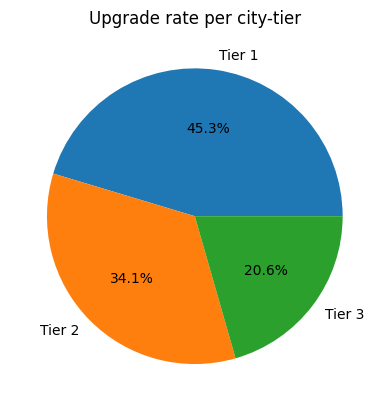

In [85]:
df_upgrade_rate_per_city = df.groupby('city_tier')['upgrade_or_not'].sum().reset_index()
plt.pie(df_upgrade_rate_per_city['upgrade_or_not'], labels = df_upgrade_rate_per_city['city_tier'], autopct = '%1.1f%%')
plt.title('Upgrade rate per city-tier')
plt.show()

Upgrade rate per age_group

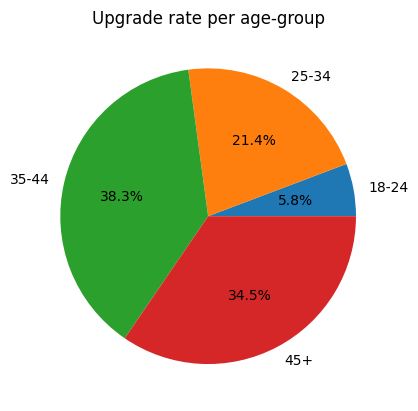

In [84]:
df_upgrade_rate_per_age_group = df.groupby('age_group')['upgrade_or_not'].mean().reset_index()

plt.pie(df_upgrade_rate_per_age_group['upgrade_or_not'], labels =df_upgrade_rate_per_age_group['age_group'], autopct = '%1.1f%%')
plt.title('Upgrade rate per age-group')
plt.show()

Total watch time per device_type


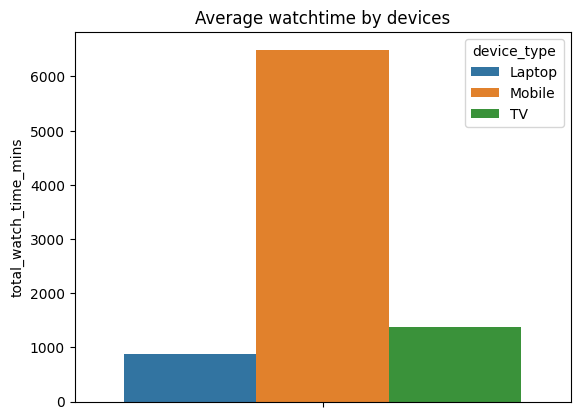

In [92]:
df_device_watch_time = df.groupby('device_type')['total_watch_time_mins'].mean().reset_index()

sns.barplot(data = df_device_watch_time, y = 'total_watch_time_mins',hue = 'device_type')
plt.title("Average watchtime by devices")
plt.show()

Average watch time of upgraded vs non-upgraded users



In [93]:
df.sample()

,user_id,age_group,city_tier,subscription_plan,new_subscription_plan,upgrade_or_not,device_type,total_watch_time_mins
43009,UIDLC9365106dd68,25-34,Tier 2,Basic,Free,0,TV,1659


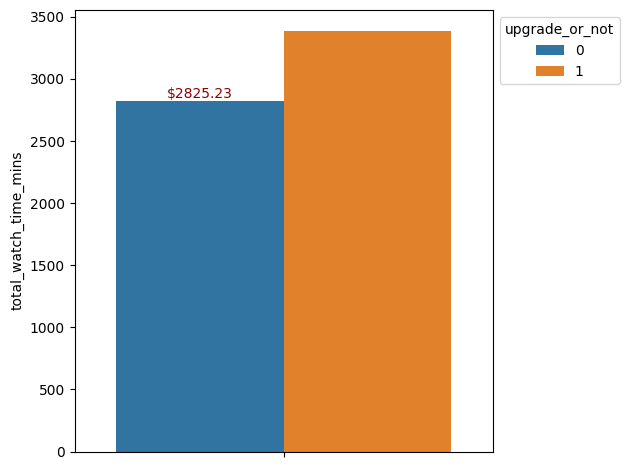

In [101]:
df_avg_watchtime = df.groupby('upgrade_or_not')['total_watch_time_mins'].mean().reset_index()
ax = sns.barplot(data = df_avg_watchtime, y = 'total_watch_time_mins', hue = 'upgrade_or_not')
ax.bar_label(ax.containers[0], fmt='$%.2f', fontsize=10, color='darkred')
sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1, 1)
)

plt.tight_layout()
plt.show()